# Random Forest is an improved version of Descision Tree algorithm
it is used both in classification and regression
</br>
descion tree has a weakness which is not using all the features and puting 0 for their coefs
</br>
and the other is that root node is always fixed and can't be changed 

# random forest uses features in random ways and by this technique it creates a lot of trees using all the features
in classification all the result would be checked and the dominant label would be choose 
</br>
in regrssion it would compute mean on all the results

In [ ]:
# Number of Estimator --> how many tree to create>
# it doesn't matter if it is a lot. our model won't be over fitted and the computition is also fast
# the recommended range is 64-128


# Number of Feature --> how many column to be choose randomly? 
# we must use this formula $ sqrt(N) $ N = total columns or Log2(N+1) for classification 
# for regression N/3


# Bootstrap Samples --> rows also would be choose randomly(one row can be choose multiple times)

# Out-of-Bag(Bootstrap aggrigated) Error --> rows that havn't been chosen in 'Bootstrap Samples' will be used to test the tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('penguins_size.csv')
print(df.shape)
df.head()

(344, 7)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
# omitting nulls

df.dropna(inplace=True) 

In [7]:
df.at[336, 'sex'] = 'FEMALE'  # go to index 336 and sex column and change the value

In [ ]:
# change object columns to number except 'species' column(we dropped it)

X = pd.get_dummies(df.drop('species', axis=1), dtype=int, drop_first=True)
y = df['species']

In [ ]:
# Train and Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Create Model

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=101) # since rf use random choosing we can use random_state
rfc.fit(X_train, y_train)
based_pred = rfc.predict(X_test)

error is: 0.01980198019801982
              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



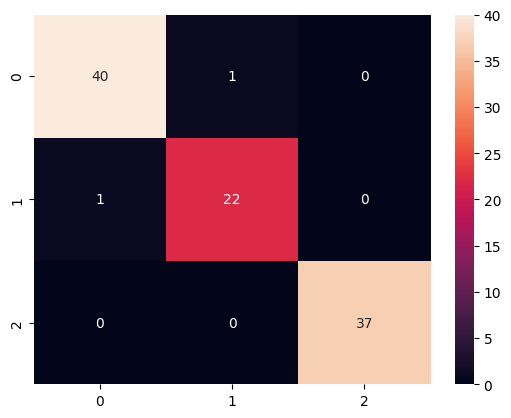

In [ ]:
# Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, based_pred)
print(f'error is: {1 - accuracy}')
print(classification_report(y_test, based_pred))

cm = confusion_matrix(y_test, based_pred)
sns.heatmap(cm, annot=True);


In [20]:
# no 0 coef and more features will be used to predict
rfc.feature_importances_

array([3.46584088e-01, 1.20150588e-01, 2.39262547e-01, 1.48533620e-01,
       1.39253740e-01, 2.10550136e-05, 6.19436222e-03])

In [ ]:
['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE']